In [1]:
#Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import re
import seaborn as sns
import scipy.stats as stats

In [2]:
#1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create
#a 360-degree view of the data. Use the same for the subsequent questions.

In [3]:
cust = pd.read_csv('C://Users//sandisk//Downloads//DataScience using PYTHON//Case Studies//Python Foundation Case Study 3 - Insurance Claims Case Study//Case Study 3 - Insurance Claims Case Study//cust_demographics.csv//')

In [4]:
claims = pd.read_csv('C://Users//sandisk//Downloads//DataScience using PYTHON//Case Studies//Python Foundation Case Study 3 - Insurance Claims Case Study//Case Study 3 - Insurance Claims Case Study//claims.csv//')

In [5]:
cust.sample(5)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
1060,30119782,Female,11-Jun-90,WA,753-397-4823,Gold
139,30227653,Female,01-Aug-81,CT,945-734-2691,Silver
132,62476442,Female,27-Jun-85,HI,528-237-8379,Silver
1032,91002298,Male,09-Apr-98,MA,349-124-3976,Gold
413,77570823,Female,20-Dec-63,AL,846-573-6251,Platinum


In [6]:
claims.sample(5)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
1079,72025178,46850495,Other causes,11/27/2017,Auto,Yes,Material only,$2173.5,1.0,Yes
979,79750669,3915010,Other causes,10/16/2018,Auto,Unknown,Material and injury,$19820,1.0,No
670,15510973,55982230,Other driver error,01/06/2018,Auto,Unknown,Material and injury,$29428.5,1.0,Yes
1044,50618311,69608621,Other causes,07/08/2017,Auto,No,Material only,$1357,1.0,Yes
411,48509529,53260501,Natural causes,03/02/2017,Auto,No,Material only,$1000,1.0,No


In [7]:
cust.duplicated().sum()

0

In [8]:
claims.duplicated().sum()

0

In [9]:
cust.dtypes

CUST_ID         int64
gender         object
DateOfBirth    object
State          object
Contact        object
Segment        object
dtype: object

In [10]:
claims.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [11]:
claims.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [12]:
cust.isna().sum()

CUST_ID        0
gender         0
DateOfBirth    0
State          0
Contact        0
Segment        0
dtype: int64

In [13]:
df = pd.merge(cust, claims, left_on = 'CUST_ID', right_on = 'customer_id', how = 'outer')

In [14]:
df.head(10)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
5,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,91609100.0,47830476.0,Natural causes,04/12/2017,Auto,Unknown,Material only,$1440,1.0,No
6,19269962.0,Male,13-May-77,NV,956-871-8691,Gold,22890252.0,19269962.0,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
7,19269962.0,Male,13-May-77,NV,956-871-8691,Gold,39219616.0,19269962.0,Other causes,09/26/2018,Auto,No,Material only,$2240,2.0,No
8,21831191.0,Male,17-May-77,NH,419-712-8513,Gold,24050443.0,21831191.0,Other driver error,10/04/2017,Auto,No,Injury only,$38306.5,3.0,Yes
9,21831191.0,Male,17-May-77,NH,419-712-8513,Gold,91475471.0,21831191.0,Driver error,02/09/2018,Auto,Unknown,Material and injury,$36810,1.0,No


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1092 non-null   float64
 1   gender               1092 non-null   object 
 2   DateOfBirth          1092 non-null   object 
 3   State                1092 non-null   object 
 4   Contact              1092 non-null   object 
 5   Segment              1092 non-null   object 
 6   claim_id             1100 non-null   float64
 7   customer_id          1100 non-null   float64
 8   incident_cause       1100 non-null   object 
 9   claim_date           1100 non-null   object 
 10  claim_area           1100 non-null   object 
 11  police_report        1100 non-null   object 
 12  claim_type           1100 non-null   object 
 13  claim_amount         1035 non-null   object 
 14  total_policy_claims  1090 non-null   float64
 15  fraudulent           1100 non-null   o

In [16]:
#2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the
#columns and their business significance.

In [17]:
df['CUST_ID'] = df['CUST_ID'].astype(object)
df['DateOfBirth'] = df['DateOfBirth'].astype('datetime64[ns]')
df['claim_id'] = df['claim_id'].astype(object)
df['customer_id'] = df['customer_id'].astype(object)
df['claim_date'] = df['claim_date'].astype('datetime64[ns]')

C:\Users\sandisk\AppData\Local\Temp\ipykernel_9416\4229754682.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateOfBirth'] = df['DateOfBirth'].astype('datetime64[ns]')


In [18]:
#3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [19]:
df['claim_amount'] = df['claim_amount'].str.replace('$',' ')
df['claim_amount'] = df['claim_amount'].astype('float64')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1092 non-null   object        
 1   gender               1092 non-null   object        
 2   DateOfBirth          1092 non-null   datetime64[ns]
 3   State                1092 non-null   object        
 4   Contact              1092 non-null   object        
 5   Segment              1092 non-null   object        
 6   claim_id             1100 non-null   object        
 7   customer_id          1100 non-null   object        
 8   incident_cause       1100 non-null   object        
 9   claim_date           1100 non-null   datetime64[ns]
 10  claim_area           1100 non-null   object        
 11  police_report        1100 non-null   object        
 12  claim_type           1100 non-null   object        
 13  claim_amount         1035 non-nul

In [21]:
df.sample(4)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
245,5637733.0,Male,2064-05-27,ID,567-617-1874,Platinum,15859475.0,5637733.0,Crime,2017-10-10,Auto,Unknown,Material only,2170.0,1.0,No
383,25634799.0,Female,1974-11-04,KS,724-781-3692,Platinum,36457152.0,25634799.0,Driver error,2017-01-01,Auto,No,Material only,2900.0,2.0,No
815,46673661.0,Male,1997-10-28,MI,123-942-4267,Platinum,72837991.0,46673661.0,Other causes,2018-10-03,Home,No,Material only,1320.0,2.0,No
213,32850276.0,Male,2063-10-29,ME,893-673-8192,Platinum,24499353.0,32850276.0,Natural causes,2018-10-09,Home,No,Material only,1580.0,1.0,No


In [22]:
#4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all 
#such claims.

In [23]:
(df['police_report'] == 'No').sum()

630

In [24]:
df['alert_flag'] = np.where(df['police_report'] == 'Yes',1,0)

In [25]:
df[['alert_flag','police_report']].sample(10)

,alert_flag,police_report
577,0,No
270,1,Yes
399,0,Unknown
508,0,No
955,0,Unknown
1096,0,Unknown
973,0,No
656,0,No
53,0,Unknown
675,0,No


In [26]:
#5.One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. 
#However, customer ID should remain unique. 
#Retain the most recent observation and delete any duplicated records inthe data based on the customer ID column.

In [27]:
df.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'alert_flag'],
      dtype='object')

In [28]:
df1 = df.sort_values(by = 'claim_date', ascending = False)
df1.drop_duplicates(subset = 'customer_id', keep = 'first',inplace = True)
df1

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
1062,58451506.0,Male,2068-04-22,FL,673-574-7823,Gold,43042986.0,58451506.0,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,0
286,93915431.0,Male,2067-09-08,ME,134-785-1687,Gold,99775483.0,93915431.0,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,0
704,86491727.0,Female,1997-01-29,IL,294-187-3286,Gold,32178193.0,86491727.0,Driver error,2018-10-30,Home,Unknown,Material only,1860.0,1.0,No,0
354,38011078.0,Female,1976-05-20,NE,271-123-1475,Gold,98795403.0,38011078.0,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,0
1084,65208809.0,Male,2064-04-22,VA,286-128-6132,Platinum,91386759.0,65208809.0,Natural causes,2018-10-30,Auto,No,Material only,2290.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,25634799.0,Female,1974-11-04,KS,724-781-3692,Platinum,36457152.0,25634799.0,Driver error,2017-01-01,Auto,No,Material only,2900.0,2.0,No,0
581,97514724.0,Male,2069-06-08,FL,641-684-7986,Platinum,97666948.0,97514724.0,Driver error,2017-01-01,Home,No,Injury only,19120.0,1.0,No,0
231,77219712.0,Female,1999-08-05,NH,649-592-8793,Platinum,61374372.0,77219712.0,Other causes,2017-01-01,Auto,No,Material and injury,20200.0,1.0,No,0
912,42664554.0,Female,1993-08-13,TN,396-973-2531,Gold,42280334.0,42664554.0,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,0


In [29]:
#6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode
#for categorical)

In [30]:
df.isnull().sum()

CUST_ID                15
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
claim_id                7
customer_id             7
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
alert_flag              0
dtype: int64

In [31]:
for column in df.columns:
    if df[column].dtype == 'object':
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
    else:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)

In [32]:
df.isnull().sum()

CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
alert_flag             0
dtype: int64

In [33]:
#7. Calculate the age of customers in years. Based on the age, categorize thecustomers according to the below criteria
#Children < 18
#Youth 18-30
#Adult 30-60
#Senior > 60

In [34]:
current_year = dt.datetime.now().year
df['Age'] = current_year - df['DateOfBirth'].dt.year

In [35]:
df['Age_category'] = None        

In [36]:
df['Age'] = df['Age'].abs()

In [37]:
bins = [0, 18, 30, 60, float('inf')]
labels = ['Children', 'Youth', 'Adult', 'Senior']

# Create the 'Age_category' column using cut()
df['Age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False, include_lowest=True)


In [38]:
df[['Age',"Age_category"]].sample(10)

,Age,Age_category
1034,38,Adult
156,37,Adult
1006,42,Adult
1071,37,Adult
451,30,Adult
64,40,Adult
1066,46,Adult
1059,33,Adult
1072,50,Adult
344,29,Youth


In [39]:
#8.What is the average amount claimed by the customers from various segments?

In [40]:
df.groupby('Segment').agg(average_amount_claimed=('claim_amount', np.mean)).reset_index()

,Segment,average_amount_claimed
0,Gold,12745.668485
1,Platinum,12341.725348
2,Silver,12208.394241


In [41]:
#9. What is the total claim amount based on incident cause for all the claims that have been done at least 
#20 days prior to 1st of October, 2018.

In [42]:
filtered_df = df[df['claim_date'] <= '2018-09-11']
filtered_df.groupby('incident_cause').agg({'claim_amount':np.sum})

,claim_amount
incident_cause,
Crime,7.294726e+05
Driver error,3.348656e+06
Natural causes,1.316441e+06
Other causes,3.866964e+06
Other driver error,3.384045e+06


In [43]:
#10.How many adults from TX, DE and AK claimed insurance for driver related issues and causes

In [44]:
adult = df[df['Age_category']=='Adult']

In [45]:
state = adult[adult['State'].isin(['TX','DE','AK'])]

In [46]:
ff = state[state['incident_cause'] == 'Driver error']

In [47]:
print('No. of adults from TX, DE and AK claimed insurance for driver related issues and causes = ',ff['Age_category'].count())

No. of adults from TX, DE and AK claimed insurance for driver related issues and causes =  19


In [48]:
#11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount
#as a percentage on the pie chart.

In [49]:
gen_seg = df.groupby(['gender','Segment']).agg({'claim_amount':np.sum})

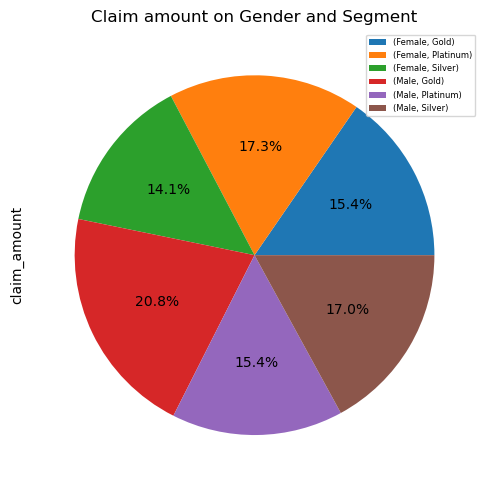

In [50]:
gen_seg.plot(kind = 'pie', subplots = True, figsize = (5,5), autopct = '%1.1f%%',fontsize=10, labeldistance=None)
plt.title('Claim amount on Gender and Segment')
plt.legend(loc = 'upper right',prop={'size': 6})
plt.tight_layout()
plt.show()

In [51]:
#12. Among males and females, which gender had claimed the most for any type of driver related issues? 
#E.g. This metric can be compared using a bar chart

In [52]:
driver_issues = df[df['incident_cause'] == 'Driver error']

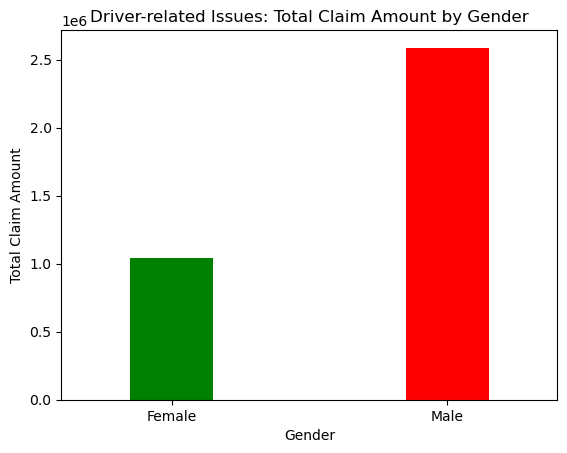

In [53]:
gender_claim_amount = driver_issues.groupby('gender')['claim_amount'].sum()

gender_claim_amount.plot(kind='bar', color=['green', 'red'], width=0.3)

plt.title('Driver-related Issues: Total Claim Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Claim Amount')
plt.xticks(rotation = 0)
plt.show()

In [54]:
#13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [55]:
fraudulent_claims = df[df['fraudulent']=='Yes']

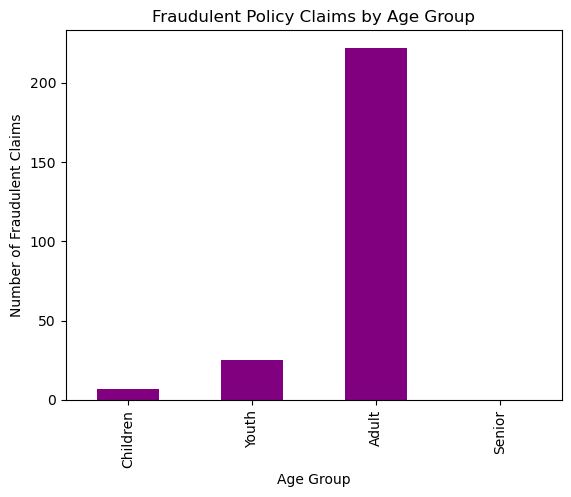

In [56]:
fraudulent_claims_by_age_group = fraudulent_claims.groupby('Age_category')['fraudulent'].count()
fraudulent_claims_by_age_group.plot(kind='bar', color='purple')

plt.title('Fraudulent Policy Claims by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Fraudulent Claims')
plt.show()

In [57]:
#14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on
#the “month” axis, the month is in a chronological order not alphabetical order. 

In [58]:
df['claim_month'] = df['claim_date'].dt.strftime('%B')

In [59]:
month_order = ['April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December','January', 'February', 'March']
df['claim_month'] = pd.Categorical(df['claim_month'], categories=month_order, ordered=True)


In [60]:
monthly_trend = df.groupby('claim_month').agg({'claim_amount':np.sum})

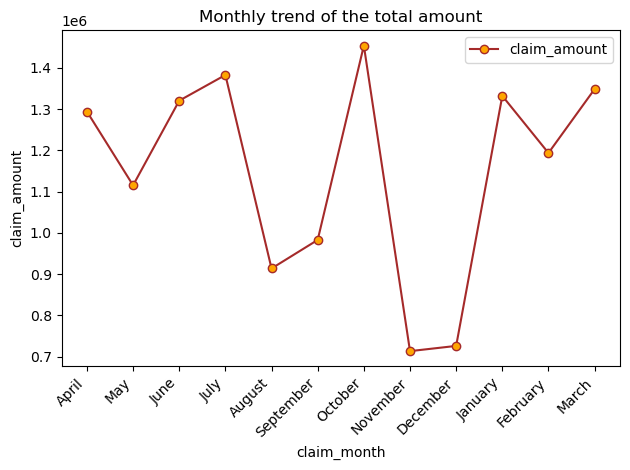

In [61]:
monthly_trend.plot(kind = 'line', marker = 'o', color = 'brown', markerfacecolor = 'orange')
plt.xticks(ticks=range(len(monthly_trend)), labels=monthly_trend.index, rotation=45, ha='right')
plt.title('Monthly trend of the total amount')
plt.ylabel('claim_amount')
plt.tight_layout()
plt.show()

In [62]:
# 15.What is the average claim amount for gender and age categories and suitably represent the above using a 
#facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

C:\Users\sandisk\AnacondaPy\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sandisk\AppData\Local\Temp\ipykernel_9416\269451395.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


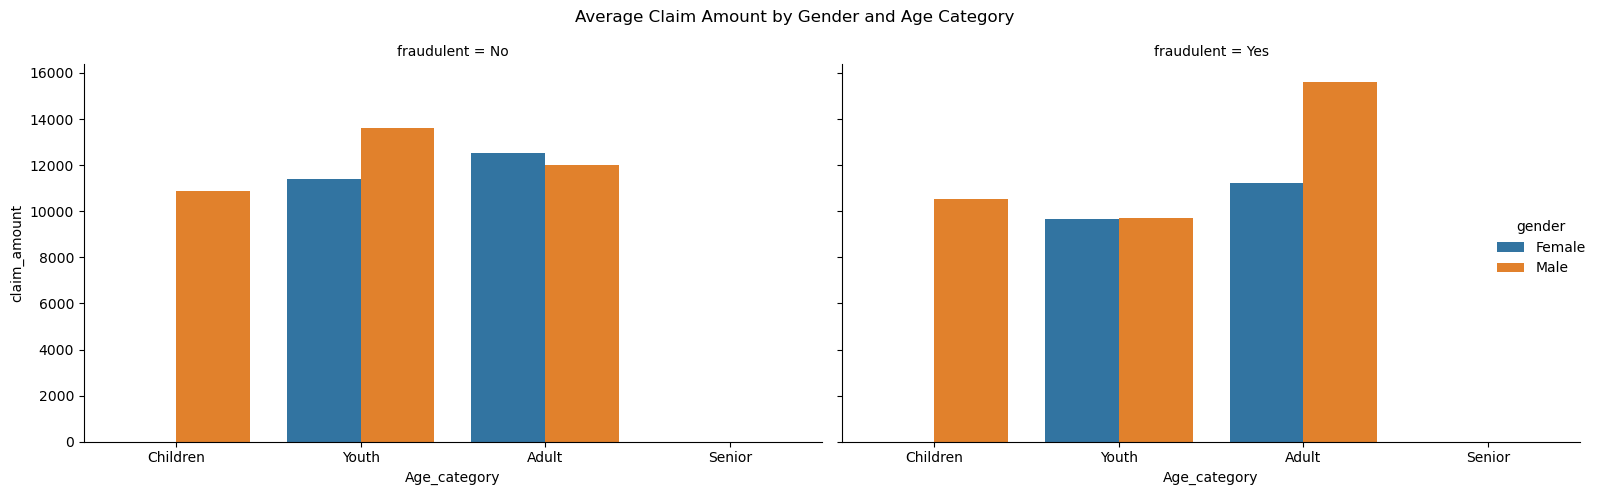

In [63]:
grouped_data = df.groupby(['gender', 'Age_category', 'fraudulent'])['claim_amount'].mean().reset_index()

sns.catplot(data=grouped_data, x='Age_category', y='claim_amount', hue='gender', col='fraudulent', kind='bar',height = 5, aspect = 1.5)

plt.suptitle('Average Claim Amount by Gender and Age Category')
plt.tight_layout()
plt.show()


## Stastical Tests

###### 16. Is there any similarity in the amount claimed by males and females?

In [64]:
#Step 1: Hypothesis testing

#Null Hypothesis
#Ho: Amount claimed by Males and Females are similar

#Alter Hypothesis
#Ha: Amount claimed by Males <> Amount claimed by Females

In [65]:
#Step 2 : T-Test(Two sample independend)

In [66]:
#Step 3 :  Choosing CI - 95% (0.95)
#Error : 5% (0.05)- alpha value

In [67]:
#Step 4 : Calculating the test statistic

In [68]:
male_amount = df.loc[df['gender']=='Male','claim_amount']

In [69]:
female_amount = df.loc[df['gender']=='Female','claim_amount']

In [70]:
stats.ttest_ind(a = male_amount, b = female_amount)

TtestResult(statistic=0.9104294436733797, pvalue=0.36279462510635385, df=1105.0)

In [71]:
#Step 5 : Conclusion

#The value of p is 0.36279 is greater than the alpha value 0.05
#We fail to reject Null hypothesis and amount claimed by males and females are statistically 

###### 17. Is there any relationship between age category and segment?

In [72]:
#Step 1 : Hypothesis testing

#Null Hypothesis
#Ho: Age category and segment are statistically independent

#Alternate Hypothesis
#Ha: Age category and segment are statistically associated

In [73]:
#Step 2: Test Statistic

#Non_Parametric tests - Chisquare(Test of independence)

In [74]:
#Step 3: CI - 95% (0.95)
#Error region - 5% (0.05) - alpha value

In [75]:
#Step 4: Calculating the test statistic

In [76]:
df[['Age_category','Segment']]

,Age_category,Segment
0,Adult,Platinum
1,Adult,Silver
2,Adult,Silver
3,Adult,Silver
4,Adult,Silver
...,...,...
1102,Children,Gold
1103,Children,Gold
1104,Children,Gold
1105,Children,Gold


In [77]:
pd.crosstab(index = df['Segment'], columns = df['Age_category'])

Age_category,Children,Youth,Adult
Segment,,,
Gold,15,48,328
Platinum,0,44,321
Silver,0,50,301


In [78]:
stats.chi2_contingency(pd.crosstab(index = df['Segment'], columns = df['Age_category']))

Chi2ContingencyResult(statistic=28.642811277339558, pvalue=9.238281017407058e-06, dof=4, expected_freq=array([[  5.29810298,  50.15537489, 335.54652213],
       [  4.94579946,  46.82023487, 313.23396567],
       [  4.75609756,  45.02439024, 301.2195122 ]]))

In [79]:
#The value of dof(degrees of freedom) is 4
#p-value = 0.000009238281

In [80]:
#Step 5: Conclusion

#We fail to reject alternate hypothesis
#Age category and Segment are statistically associated

###### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [ ]:
#Step 1: Hypothesis testing

#Null Hypothesis
#Ho:  Current year mean claim amount is same as 2016-2017 claim amount

#Alternate Hypothesis
#Ha: Current year mean claim amount is greater than 2016-2017 claim amount

In [ ]:
#Step 2: Test Statistic

#One sample t-test

In [ ]:
#Step 3:  Choosing CI(Confidence interval) - 95% - 0.95
#Error region is 5% - 0.05

In [ ]:
#Step 4: Calculating the test statistic

In [84]:
current_year = df['claim_date'].dt.year.max()

current_year_df = df[df['claim_date'].dt.year == current_year]


current_year_mean = current_year_df['claim_amount'].mean()

In [85]:
fiscal_average = 10000

In [86]:
stats.ttest_1samp(current_year_df['claim_amount'], fiscal_average)

TtestResult(statistic=4.359707103269084, pvalue=1.5862380370283368e-05, df=493)

In [ ]:
#Step 5: Conclusion

# The p value is 0.000015862380370
# We fail to reject the alternate Hypothesis
# Current year mean claim amount is greater than 2016-2017 claim amount

###### 19. Is there any difference between age groups and insurance claims?

In [ ]:
#Step 1: Hypothesis testing

#Null Hypothesis
#Ho: Age groups and insurance claim are statistically significant

#Alternate Hypothesis
#Ha: Age groups and insurance claim are not statistically significant

In [ ]:
#Step 2: Test statistic

#Annova - f test

In [ ]:
#Step 3 : CI- 95% - 0.95
#Error: 5% - 0.05 - alpha value

In [ ]:
#Step 4: Calculate test statistic

In [113]:
s_1 = df.loc[df['Age_category']=='Children','claim_amount']
s_2 = df.loc[df['Age_category']=='Youth','claim_amount']
s_3 = df.loc[df['Age_category']=='Adult','claim_amount']

In [114]:
stats.f_oneway(s_1,s_2,s_3)

F_onewayResult(statistic=0.22067465971100902, pvalue=0.8020129199473196)

In [ ]:
#Step 5: Conclusion

#The p_value is 0.8020129199473196
#We fail to reject null hypothesis
#Age groups and insurance claim are statistically significant

###### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [ ]:
#Step 1: Hypothesis testing

#Null Hypothesis
#Ho: Total number of policy claims and the claimed amount are statistically independent

#Alternate Hypothesis
#Ha: Total number of policy claims and the claimed amount are not statistically independent

In [ ]:
#Step 2: Test Statistic

#Correlation
# Pearson correlation coefficient(r)

In [ ]:
#Step 3: CI- 95% - 0.95
#Error: 5% - 0.05 - alpha value

In [ ]:
#Step 4: Calculating the test statistic

In [116]:
stats.pearsonr(df['total_policy_claims'], df['claim_amount'])

PearsonRResult(statistic=-0.019490781428136848, pvalue=0.5171023067319807)

In [ ]:
#Step 5: Conclusion

#The p_value is 0.5171023067319807
#We fail to reject Null Hypothesis
#Total number of policy claims and the claimed amount are statistically independent

In [4]:
for i in range(1,101):
    if int(i*0.5)==i*0.5:
print(i)

IndentationError: expected an indented block after 'if' statement on line 2 (3243940870.py, line 3)

In [7]:
i=1
while False:
    if i%2==0:
        break 
        print(i)
        i+=2

In [8]:
print(i)

1


In [ ]:
a=False
while not a:
    try:
        f_n = input("Enter file name")
        i_f = open(f_n, 'r')
    except:
        print("Input file not found")

Enter file nameyou
Input file not found
Enter file namethe
Input file not found
Input file not found
Input file not found


In [ ]:
x = [34, 56]
print((''.join(list(map(str, x)))),)
